## Упражнение 1

В файлах `wild_type.txt` и `mutant.txt` находятся данные по флуоресценции клеток, экспрессирующих обычную и мутантную формы белка, соответственно, в зависимости от концентрации лиганда (вещества, которое взаимодействует с белком). Продемонстрируйте данные на графике. Столбцы разделены табуляцией - `\t`. Разрешается (и приветствуется) просмотр исходных файлов.

wild_type is opened successfully
mutant is opened successfully


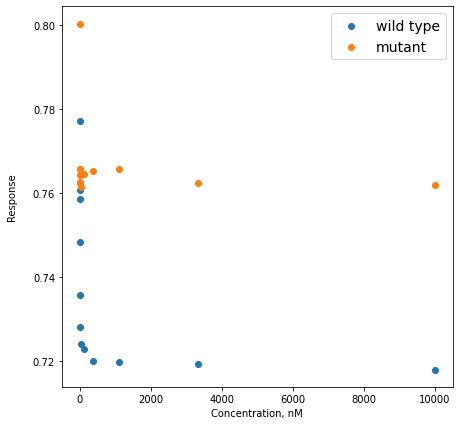

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))


file1 = open("wild_type.txt","r")     
if file1:    
    print("wild_type is opened successfully")
aList = []  
bList = []    
title = file1.readline().split("\t")
while True:
    aLine = file1.readline() 
    if not aLine: 
        break 
    l = aLine.split("\t") 
    x1 = float(l[0]) 
    y1 = float(l[1]) 
    aList.append(x1) 
    bList.append(y1) 
file1.close() 

file2 = open("mutant.txt","r")     
if file2:    
    print("mutant is opened successfully")
cList = []  
dList = []  
title = file2.readline().split("\t")
while True:  
    aLine = file2.readline() 
    if not aLine:  
        break 
    l = aLine.split("\t") 
    x2 = float(l[0]) 
    y2 = float(l[1]) 
    cList.append(x2)
    dList.append(y2) 
file2.close() 

sp1 = plt.subplot(111)
sp1.scatter(aList, bList, label='wild type') #рисуются  отдельные точки
sp1.scatter(cList, dList, label= 'mutant')
plt.legend(loc='best', fontsize=14)
plt.xlabel(title[0]) 
plt.ylabel(title[1])

plt.show ()

## Упражнение 2

В файле `chromo.txt` находится хроматограмма - сигнал детектора в зависимости от времени. Продемонстрируйте данные на графике. Столбцы разделены табуляцией - `\t`. Разрешается (и приветствуется) просмотр исходных файлов.

file is opened successfully


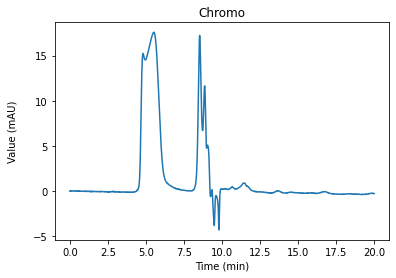

In [5]:
import matplotlib.pyplot as plt;

#Открытие файла
file = open("Chromo.txt","r")     
if file:    
    print("file is opened successfully")
xList = []  #Открытие списка переменных оси X
yList = []  #Открытие списка переменных оси Y  
title = file.readline().split("\t")  #Читаем 1 стоку файла с наименованием осей и переводим в двумерный массив, используя разделитель \t 
while True:  #Цикл чтения строк из файла
    aLine = file.readline() #читаем строку
    if not aLine:  #конец файла
        break #выходим из цикла
    l = aLine.split("\t") #делим строку на переменные используя разделитель \t 
    x = float(l[0]) #переменная X
    y = float(l[1]) #переменная Y
    xList.append(x) #добавляем к списку X
    yList.append(y) #добавляем к списку Y
file.close() 

plt.plot(xList, yList) #задаём переменные для графика  
plt.title('Chromo')
plt.xlabel(title[0]) 
plt.ylabel(title[1])

plt.show() 

## Упражнение 3

Напишите функцию, которая определяет коэффициент корреляции. Посчитайте с её помощью коэффициент корреляции для данных, показанных в примере для точечного графика (3 набора), а также из упражнения 1 (2 набора)

In [3]:
import numpy as np;
import math;

#Функция вычисление коэффициента корреляции
#x - массив значений, X; y - массив значений, Y

def calc_corr(x, y):
    x_avg = sum(x)/len(x) #среднее значение
    y_avg = sum(y)/len(y) 
  
    #Вычислить числитель, ковариация —— согласно формуле ковариации изначально необходимо было делить на n
    #Поскольку n одновременно уменьшается в коэффициенте корреляции, нет необходимости делить на n
    cov_xy = sum([(x - x_avg)*(y - y_avg) for x,y in zip(x, y)]) #где zip(x, y) функция парной итерации
  
    #Вычислить знаменатель, произведение дисперсии - дисперсию следует разделить на n
    #В коэффициенте корреляции n одновременно уменьшается
    sD = math.sqrt(sum([(d - x_avg)**2 for d in x])*sum([(d - y_avg)**2 for d in y]))
  
    corr_factor = cov_xy/sD
  
    return corr_factor
  

#набор данных для случая 1 
x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([0.99, 0.49, 0.35, 0.253, 0.18])

#набор данных для случая 2 
x2 = np.random.rand(100) 
y2 = np.random.rand(100)

#набор данных для случая 3 
data = 10 * np.random.rand(100) 
x3 = np.sort(data)              
epsilon3 = np.random.rand(100)  
y3 = (x3-5)**2 / 10 + epsilon3 - 0.5

corr_1 = calc_corr(x1, y1)
corr_2 = calc_corr(x2, y2)
corr_3 = calc_corr(x3, y3)

print("случай 1 =", corr_1, "\nслучай 2 =", corr_2, "\nслучай 3 =", corr_3)

#Открытие файла wild_type.txt
file = open("wild_type.txt","r")     
if file:    
    print("wild_type.txt is opened successfully")
xList = []  #Открытие списка переменных оси X
yList = []  #Открытие списка переменных оси Y  
file.readline() #Пропускаем 1 стоку файла с наименованием
while True:  #Цикл чтения строк из файла
    aLine = file.readline() #читаем строку
    if not aLine:  
        break 
    l = aLine.split("\t") 
    x = float(l[0])
    y = float(l[1])
    xList.append(x) 
    yList.append(y) 
file.close()

corr_wilde = calc_corr(xList, yList)

print("wild_type =", corr_wilde)

#Открытие файла mutant.txt
file = open("mutant.txt","r")     
if file:    
    print("mutant.txt is opened successfully")
xList = []  
yList = []  
file.readline() 
while True: 
    aLine = file.readline() 
    if not aLine: 
        break 
    l = aLine.split("\t") 
    x = float(l[0])
    y = float(l[1]) 
    xList.append(x) 
    yList.append(y)
file.close() 

corr_mutant = calc_corr(xList, yList)

print("mutant =", corr_mutant)

случай 1 = -0.9117025433725147 
случай 2 = 0.05084107233251676 
случай 3 = 0.2163606564759683
wild_type.txt is opened successfully
wild_type = -0.4069458455729012
mutant.txt is opened successfully
mutant = -0.19653678303553646
